# Machine learning experiment 1

In [1]:
# setup code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

# Housing Data Loading and Preprocessing

In [2]:
# Load the raw housing_scale data.
filename = 'dataset/housing_scale'
X, y = load_svmlight_file(filename)

# Split the data into train, and val sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Train data shape:  (404, 13)
Train labels shape:  (404,)
Validation data shape:  (102, 13)
Validation labels shape:  (102,)


In [3]:
# Preprocessing: subtract the mean of each housing feature
# first: compute the housing feature mean based on the training data

_mean = np.mean(X_train, axis=0)
print(_mean)

[[-0.91702508 -0.76945545 -0.22159092 -0.84158416 -0.308534    0.03766704
   0.33956011 -0.50958712 -0.26345231 -0.17459005  0.24225822  0.79955463
  -0.3902572 ]]


In [4]:
# second: subtract the mean from train and X_val data
X_train -= _mean
X_val -= _mean

In [5]:
# third: append the bias dimension of ones
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

print(X_train.shape, X_val.shape)

(404, 14) (102, 14)


In [6]:
# 
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

print('Train labels shape: ', y_train.shape)
print('Validation labels shape: ', y_val.shape)

Train labels shape:  (404, 1)
Validation labels shape:  (102, 1)


# Linear Regresser

regresser_loss_naive(w, X_train, y_train, reg) return loss, grad

regresser_loss_vectorized(w, X_train, y_train, reg) return loss, grad

prediction = 
loss = 0.5 * (_y - y)**2 + reg * sum(W**2) 

In [7]:
def regresser_loss_naive(W, X, y, reg):
    '''
    linear regression loss function, naive implementation (with loops).
    
    Inputs:
    - W: A numpy array of shape (D, 1) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N, 1) containing training labels.
    - reg: (float) regularization strength
    
    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    '''
    num_train = X.shape[0]
    
    loss = 0.0
    grad = np.zeros(W.shape) # initialize the gradient as zero
    
    # compute the loss and the gradient
    for i in range(num_train):
        _y = np.sum(X[i] * W)
        loss += (y[i][0] - _y)**2
        grad += - 2 * X[i].T * (y[i][0] - _y)
    loss /= num_train
    grad /= num_train
    
    # Add regularization to the loss and gradient.
    loss += reg * 0.5 * np.sum(np.square(W))
    grad += reg * W
    
    return loss, grad

def regresser_loss_vectorized(W, X, y, reg):
    '''
    linear regression loss function, vectorized implementation.
    
    Inputs and outputs are the same as regresser_loss_naive.
    '''
    _y = X.dot(W) # (404, 1)
    loss = np.mean(np.square(y - _y)) + reg * 0.5 * np.sum(np.square(W))
    grad = - 2 * X.T.dot(y - _y) / X.shape[0] + reg * W
    return loss, grad

# Gradient Check

Performing a gradient check is as simple as comparing the analytic gradient to the numerical gradient. 


In [8]:
def eval_numerical_gradient(f, x, analytic_grad, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        
        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x)
        x[ix] = oldval - h
        neg = f(x)
        x[ix] = oldval

        grad_numerical = (pos - neg) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))
        
        it.iternext()

In [9]:
W = np.zeros((X_train.shape[1], 1))

# do the gradient check with regularization turned off
print('gradient check with regularization turned off')
loss, grad = regresser_loss_naive(W, X_train, y_train, 0.0)
f = lambda w: regresser_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

# do the gradient check once again with regularization turned on
print('\ngradient check with regularization turned on')
loss, grad = regresser_loss_naive(W, X_train, y_train, 0.5)
f = lambda w: regresser_loss_naive(w, X_train, y_train, 0.5)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

gradient check with regularization turned off
numerical: 1.450196 analytic: 1.450196, relative error: 2.500940e-09
numerical: -3.240397 analytic: -3.240397, relative error: 1.674595e-09
numerical: 4.489404 analytic: 4.489404, relative error: 4.655180e-09
numerical: -1.516704 analytic: -1.516704, relative error: 1.586829e-08
numerical: 3.886106 analytic: 3.886106, relative error: 3.878214e-09
numerical: -3.181649 analytic: -3.181649, relative error: 1.135836e-09
numerical: 4.368756 analytic: 4.368756, relative error: 3.308320e-09
numerical: -1.940520 analytic: -1.940520, relative error: 2.548463e-09
numerical: 5.329158 analytic: 5.329158, relative error: 2.154025e-09
numerical: 5.378774 analytic: 5.378774, relative error: 4.449455e-09
numerical: 4.349617 analytic: 4.349617, relative error: 1.702340e-09
numerical: -2.730431 analytic: -2.730431, relative error: 7.580849e-10
numerical: 5.300355 analytic: 5.300355, relative error: 1.074430e-09
numerical: -45.044554 analytic: -45.044554, rel

# Performance Comparison

compare the performance of the naive implementation and vetorized implementation of gradient computing.



In [10]:
import time

tic = time.time()
loss_naive, grad_naive = regresser_loss_naive(W, X_train, y_train, 0.5)
toc = time.time()
print('Naive implementation computed in %fs' % (toc - tic))


tic = time.time()
loss_vectorized, grad_vectorized = regresser_loss_vectorized(W, X_train, y_train, 0.5)
toc = time.time()
print('Vectorized implementation computed in %fs' % (toc - tic))


print('difference of loss: %f' % (loss_naive - loss_vectorized))
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference of gradient: %f' % difference)

Naive implementation computed in 0.011980s
Vectorized implementation computed in 0.000250s
difference of loss: 0.000000
difference of gradient: 0.000000


# Gradient Descent

In [11]:
#
# reg: regularization strength.
# lr: learning rate for optimization.
# num_iters: number of steps to take when optimizing
reg = 0.5
lr = 0.001
num_iters=1200


W = np.zeros((X_train.shape[1], 1))
loss_train_history = []
loss_val_history = []
for i in range(num_iters):
    loss_train, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
    W -= lr * grad
    
    loss_val, _ = regresser_loss_vectorized(W, X_val, y_val, reg)
    
    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)
    if i % 100 == 0:
        print('iteration %d / %d: train loss: %f\tvaluation loss: %f' 
              % (i, num_iters, loss_train, loss_val))

iteration 0 / 1200: train loss: 588.034356	valuation loss: 606.274156
iteration 100 / 1200: train loss: 414.155465	valuation loss: 437.078733
iteration 200 / 1200: train loss: 310.078673	valuation loss: 334.630586
iteration 300 / 1200: train loss: 247.436201	valuation loss: 272.148823
iteration 400 / 1200: train loss: 209.531183	valuation loss: 233.745890
iteration 500 / 1200: train loss: 186.468383	valuation loss: 209.931917
iteration 600 / 1200: train loss: 172.350288	valuation loss: 195.005927
iteration 700 / 1200: train loss: 163.645497	valuation loss: 185.526136
iteration 800 / 1200: train loss: 158.230977	valuation loss: 179.405345
iteration 900 / 1200: train loss: 154.825866	valuation loss: 175.372308
iteration 1000 / 1200: train loss: 152.654814	valuation loss: 172.649238
iteration 1100 / 1200: train loss: 151.246875	valuation loss: 170.757855


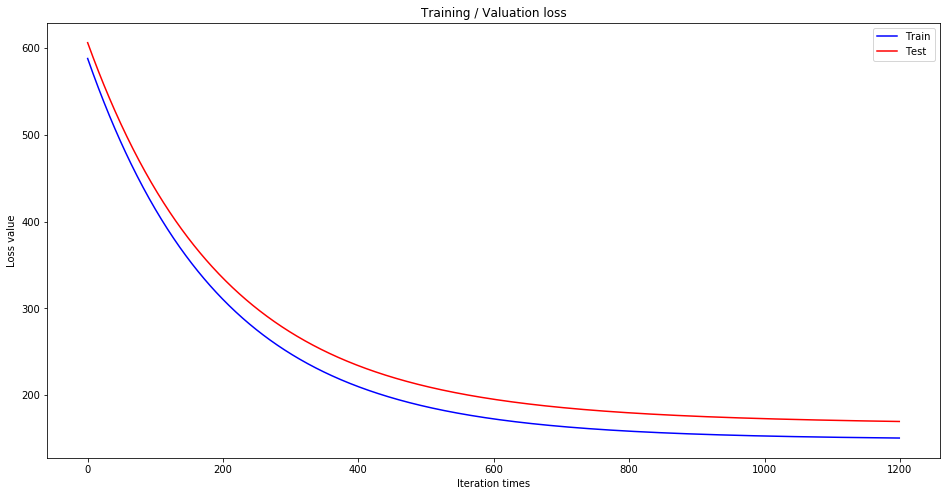

In [12]:
plt.title('Training / Valuation loss')
plt.plot(loss_train_history,'blue',label='Train')
plt.plot(loss_val_history,'red',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

# Cross-Validation

Use the validation set to tune hyperparameters (regularization strength and learning rate).



In [13]:
# first run coarse search
# If the cost is 3 times greater than origin cost,break out early to avoid explosions

max_count = 100

results = {}
lowest_loss = float('inf')   # The lowest validation loss that we have seen so far.
best_W = None # The weight matrix that achieved thelowest validation loss.
best_setup = None # the best hyperparameter to get the best_W, (lr, reg, num_iters)

for i in range(max_count):
    W = np.zeros((X_train.shape[1], 1))
    reg = 10**np.random.uniform(-5, 5)
    lr = 10**np.random.uniform(-6, -3)
    
    loss_init, _ = regresser_loss_vectorized(W, X_train, y_train, reg)
    for i in range(1500):
        loss, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
        W -= lr * grad
        if loss > 3 * loss_init:
            break
    loss_train, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    loss_val, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    
    results[lr, reg] = loss_train, loss_val
    if loss_val < lowest_loss:
        lowest_loss = loss_val
        best_W = W
        best_setup = (lr, reg, num_iters)


for lr, reg in sorted(results):
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

lr 1.058086e-06, reg 7.198266e-02, train loss: 584.516553, validation loss: 584.516553
lr 1.266723e-06, reg 1.084326e+00, train loss: 583.829730, validation loss: 583.829730
lr 1.347777e-06, reg 3.049481e-02, train loss: 583.557369, validation loss: 583.557369
lr 1.444651e-06, reg 1.145427e-05, train loss: 583.236884, validation loss: 583.236884
lr 1.734862e-06, reg 6.547011e+04, train loss: 588.000389, validation loss: 588.000389
lr 1.927306e-06, reg 2.221025e+01, train loss: 581.843650, validation loss: 581.843650
lr 2.077748e-06, reg 1.371752e-02, train loss: 581.148267, validation loss: 581.148267
lr 2.226243e-06, reg 1.746404e-03, train loss: 580.659412, validation loss: 580.659412
lr 2.284139e-06, reg 8.675861e-04, train loss: 580.468978, validation loss: 580.468978
lr 2.390856e-06, reg 9.816469e-04, train loss: 580.118163, validation loss: 580.118163
lr 2.433741e-06, reg 1.144676e-03, train loss: 579.977254, validation loss: 579.977254
lr 2.604670e-06, reg 1.393760e+04, train lo

In [14]:
# observe that low cost achieved when lr (1e-4, 1e-2), reg (1e-5, 1e-3) 
# then run fine search

max_count = 256

results = {}
lowest_loss = float('inf')   # The lowest validation loss that we have seen so far.
best_W = None # The weight matrix that achieved thelowest validation loss.
best_setup = None # the best hyperparameter to get the best_W, (lr, reg, num_iters)

for i in range(max_count):
    W = np.zeros((X_train.shape[1], 1))
    reg = 10**np.random.uniform(-5, 0)
    lr = 10**np.random.uniform(-4, -1)
    
    loss_init, _ = regresser_loss_vectorized(W, X_train, y_train, reg)
    for i in range(2000):
        loss, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
        W -= lr * grad
        if loss > 3 * loss_init:
            break
    loss_train, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    loss_val, _ = regresser_loss_vectorized(W, X_train, y_train, 0)
    
    results[lr, reg] = loss_train, loss_val
    if loss_val < lowest_loss:
        lowest_loss = loss_val
        best_W = W
        best_setup = (lr, reg, num_iters)


for lr, reg in sorted(results):
    loss_train, loss_val = results[(lr, reg)]
    print('lr %e, reg %e, train loss: %f, validation loss: %f' % (
                lr, reg, loss_train, loss_val))
    
print('lowest validation loss achieved: %f' % lowest_loss)

lr 1.176395e-04, reg 9.187090e-01, train loss: 278.007091, validation loss: 278.007091
lr 1.186615e-04, reg 1.065018e-01, train loss: 254.872478, validation loss: 254.872478
lr 1.187522e-04, reg 4.961282e-04, train loss: 251.777719, validation loss: 251.777719
lr 1.244828e-04, reg 7.664185e-04, train loss: 242.408533, validation loss: 242.408533
lr 1.252933e-04, reg 3.432399e-03, train loss: 241.196328, validation loss: 241.196328
lr 1.292731e-04, reg 2.434728e-03, train loss: 234.948479, validation loss: 234.948479
lr 1.352621e-04, reg 3.621692e-04, train loss: 225.892348, validation loss: 225.892348
lr 1.369520e-04, reg 3.914079e-03, train loss: 223.549559, validation loss: 223.549559
lr 1.376252e-04, reg 6.607145e-05, train loss: 222.452342, validation loss: 222.452342
lr 1.437323e-04, reg 3.691697e-02, train loss: 215.158070, validation loss: 215.158070
lr 1.558946e-04, reg 1.309827e-02, train loss: 198.511859, validation loss: 198.511859
lr 1.559476e-04, reg 2.889622e-01, train lo

In [15]:
print('learning rate: %f, regularization strength: %f' 
      % (best_setup[0], best_setup[1]))
loss_train, _ = regresser_loss_vectorized(best_W, X_train, y_train, best_setup[1])
loss_val, _ = regresser_loss_vectorized(best_W, X_val, y_val, best_setup[1])
print('training loss:', loss_train)
print('valuation loss:', loss_val)

learning rate: 0.081585, regularization strength: 0.000015
training loss: 21.8692545306
valuation loss: 23.3866301319


In [16]:
reg = best_setup[1]
lr = best_setup[0]
num_iters=100

W = np.zeros((X_train.shape[1], 1))
loss_train_history = []
loss_val_history = []
for i in range(num_iters):
    loss_train, grad = regresser_loss_vectorized(W, X_train, y_train, reg)
    W -= lr * grad
    
    loss_val, _ = regresser_loss_vectorized(W, X_val, y_val, reg)
    
    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)
    if i % 100 == 0:
        print('iteration %d / %d: train loss: %f\tvaluation loss: %f' 
              % (i, num_iters, loss_train, loss_val))

iteration 0 / 100: train loss: 588.034356	valuation loss: 446.435230


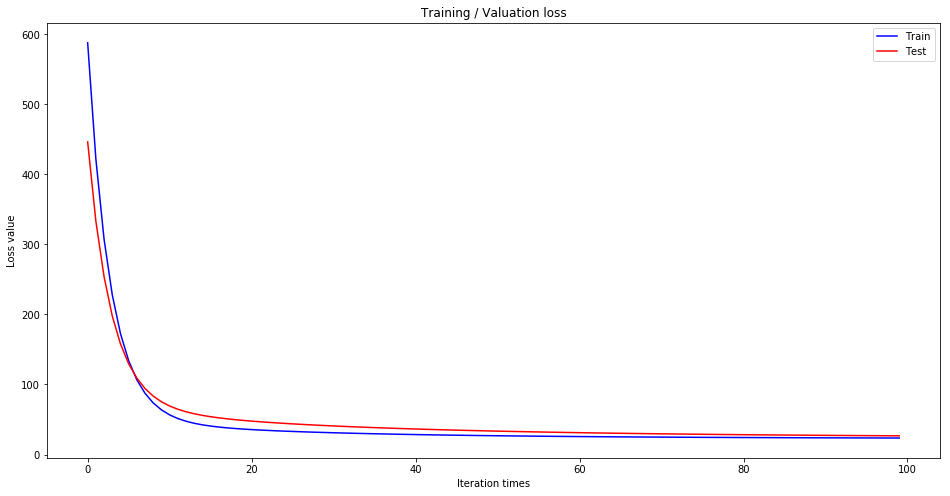

In [17]:
plt.title('Training / Valuation loss')
plt.plot(loss_train_history,'blue',label='Train')
plt.plot(loss_val_history,'red',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()